## 1. 앙상블(Ensemble)

머신러닝 앙상블이란 여러 개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법
* 앙상블 기법의 종류
  * 보팅(Voting): 투표를 통해 결과를 도출
  * 배깅(Bagging): 샘플 중복 생성을 통해 결과를 도출
  * 부스팅(Boosting): 이전 오차를 보완하면서 가중치를 부여
  * 스태킹(Stacking): 여러 모델을 기바능로 예측된 결과를 통해 meta 모델이 다시 한번 예측
  

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']

x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)

  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_prediction
  global colors

  plot_predictions(name_, pred, actual)

  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True) # x의 두번째 자리 숫자 가져와서 내림차순

  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)

  min_ = df['mse'].min() - 10 # 그래프를 그릴 때 보기 좋으라고 상한과 하한을 주기 위해서
  max_ = df['mse'].max() + 10

  length = len(df)

  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])

  for i, v in enumerate(df['mse']): # mse 데이터에 index값과 value 값이 있는데 각각 i와 v로 for문
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)

  plt.show()


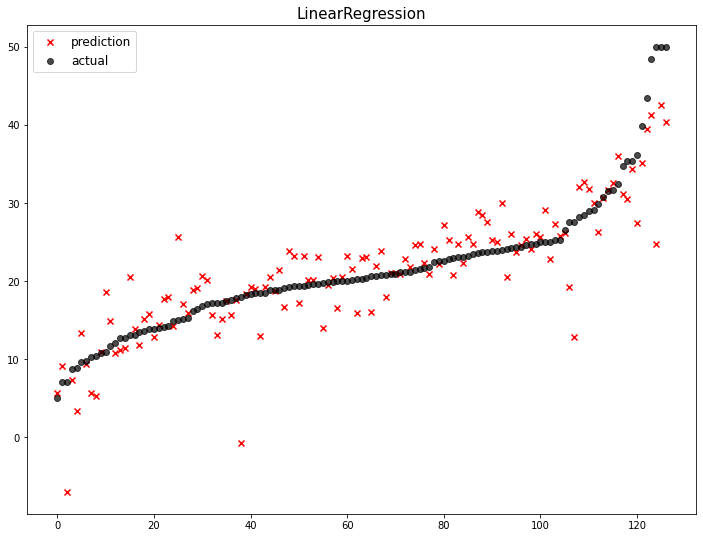

              model        mse
0  LinearRegression  22.098695


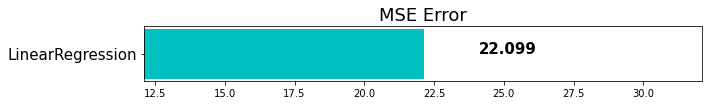

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

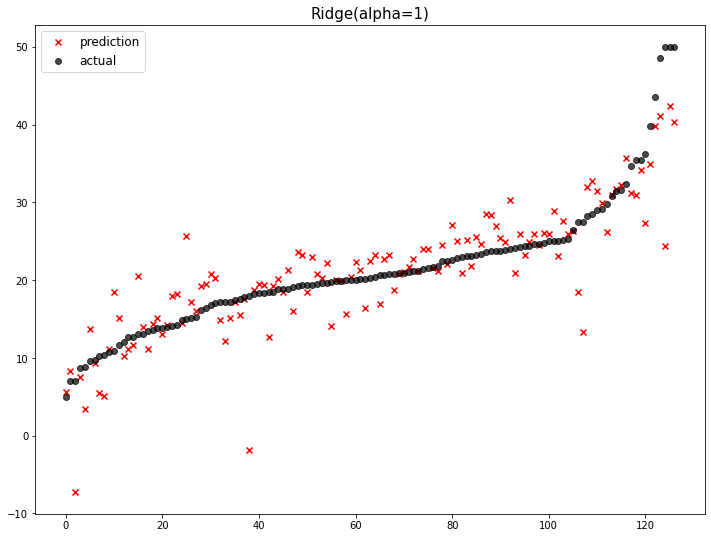

              model        mse
0    Ridge(alpha=1)  22.480476
1  LinearRegression  22.098695


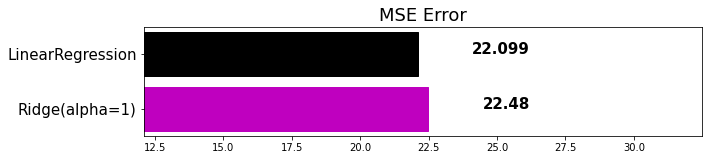

In [5]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

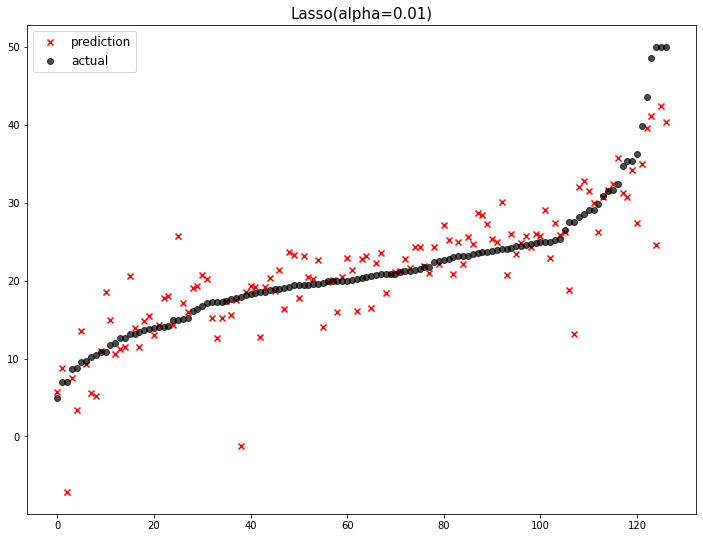

               model        mse
0     Ridge(alpha=1)  22.480476
1  Lasso(alpha=0.01)  22.210557
2   LinearRegression  22.098695


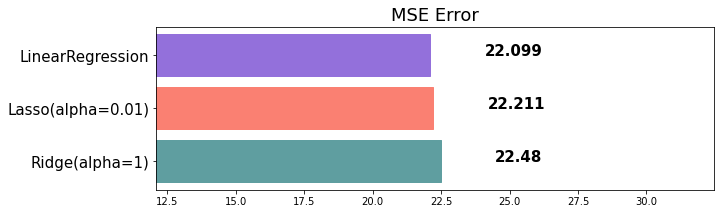

In [6]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

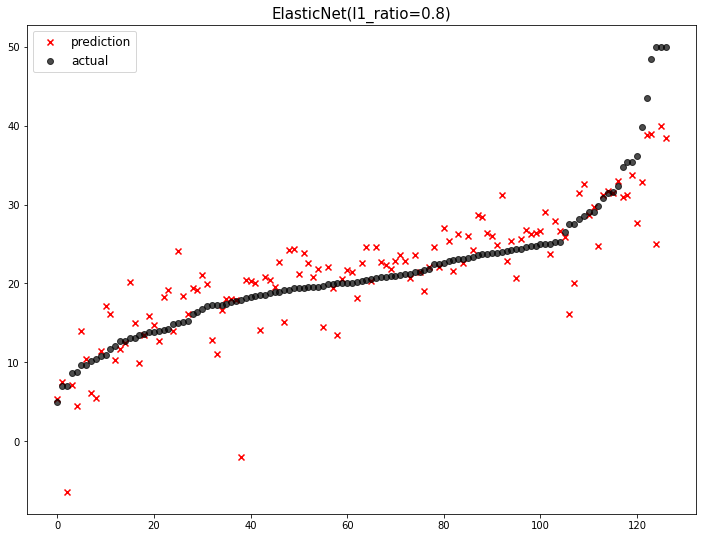

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1            Ridge(alpha=1)  22.480476
2         Lasso(alpha=0.01)  22.210557
3          LinearRegression  22.098695


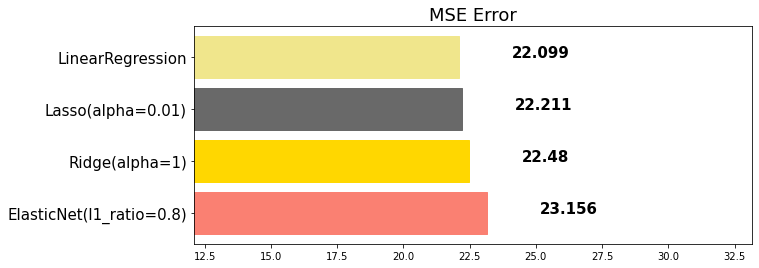

In [7]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)

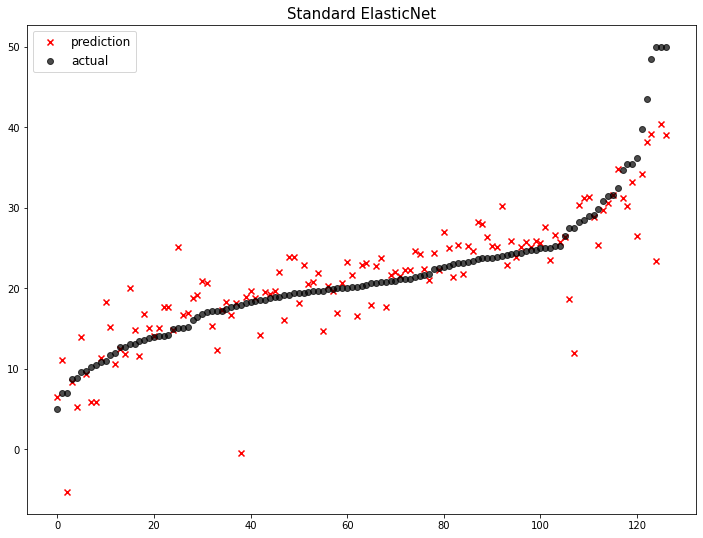

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695


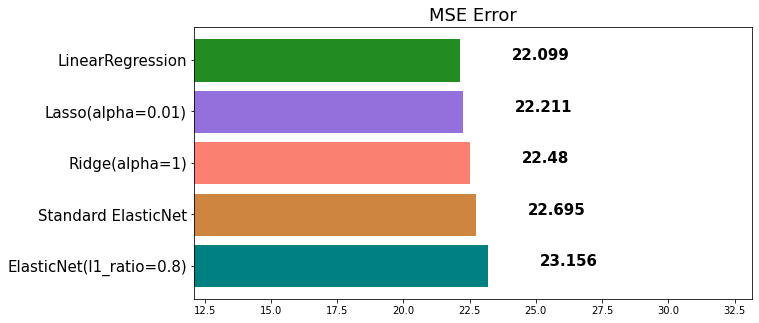

In [8]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.782e+01, tolerance: 3.361e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


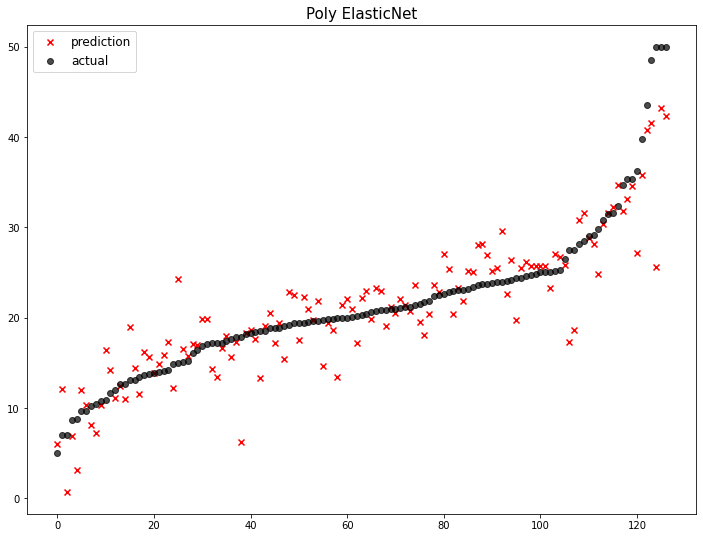

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Poly ElasticNet  15.710492


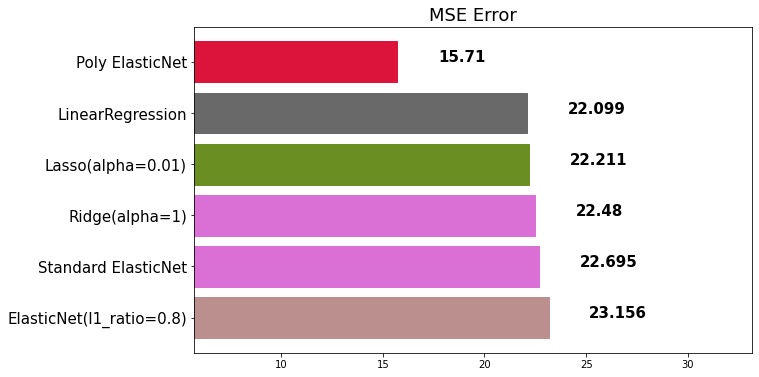

In [9]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

### 1-1. 보팅 - 회귀
* 투표를 통해 결정하는 방식
* Bagging과 투표 방식이라는 점에서 유사하지만, 아래와 같은 큰 차이점이 있음
  1. Voting은 다른 알고리즘을 model을 조합해서 사용
  2. Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용

In [10]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [11]:
# 반드시 tuple 형태로 모델을 정의해야 함
single_models = [
    ('linear-reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet_pipeline', elasticnet_pipeline),
    ('poly_pipeline', poly_pipeline)
]

In [12]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [13]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear-reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                       

In [14]:
voting_pred = voting_regressor.predict(x_test)

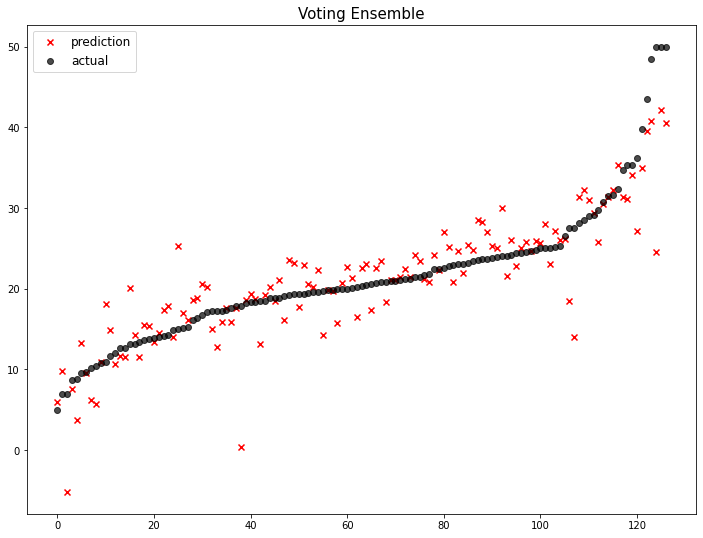

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Voting Ensemble  20.474757
6           Poly ElasticNet  15.710492


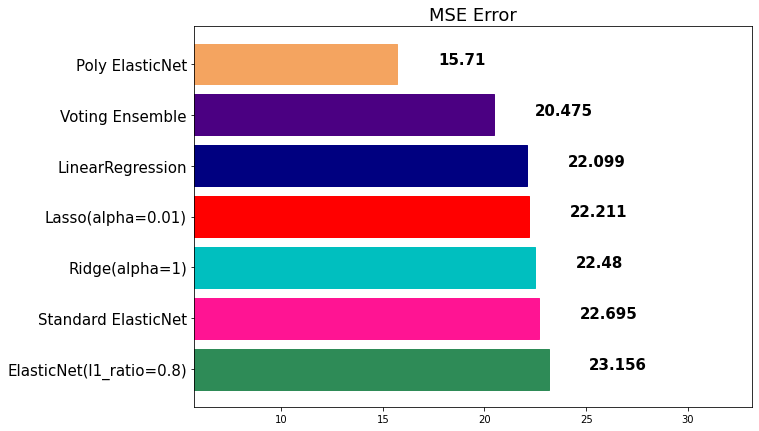

In [15]:
mse_eval('Voting Ensemble', voting_pred, y_test)

### 1-2. 보팅 - 분류
* 분류기 모델을 만들 때, Voting 앙상블은 중요한 파라미터가 존재함
* voting = {'hard', 'soft'}
* hard: class 0, 1로 분류 예측을 하는 이진 분류일 때 결과 값에 대한 다수 class를 차용
  * 예) 분류를 예측한 값이 1, 0, 0, 1, 1 이었다면 1이 3표, 0이 2표를 받았으므로 1이 최종값으로 예측을 하게 됨
* soft: 각각의 확률의 평균값을 계산한 다음에 가장 확률이 높은 값으로 확정
  * 예) class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이 있고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6)이었다면
    * class 0이 나올 최종 확률은 (0.4 + 0.9 + 0.9 + 0.4 + 0.4) / 5 = 0.6
    * class 1이 나올 최종 확률은 (0.6 + 0.1 + 0.1 + 0.6 + 0.6) / 5 = 0.4가 되기 때문에 class 0이 최종으로 확률이 높은 값으로 확정

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [17]:
models = [
    ('Logi', LogisticRegression()),
    ('ridge', RidgeClassifier())
]

In [18]:
vc = VotingClassifier(models, voting='hard') # 투표 값으로 보팅

### 1-3. 배깅(Bagging)
* Bagging은 Bootstrap Aggregating의 줄임말
* Bootstrap은 여러 개의 dataset의 중첩을 허용하게 하여 샘플링하여 분할하는 방식
  * 예) 데이터셋의 구성이 [1, 2, 3, 4, 5]로 되어 있다면, 
    1. group1 = [1, 2, 3]
    2. group2 = [1, 3, 4]
    3. group3 = [2, 3, 5]
* 대표적인 Bagging 앙상블
  * Random Forest
  * Bagging

### 1-4. Random Forest
* Decision Tree(의사결정 나무) 기반 Bagging 앙상블
* 굉장히 인기있는 앙상블 모델
* 사용성이 쉽고, 성능도 우수함

In [19]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [20]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [21]:
rfr_pred = rfr.predict(x_test)

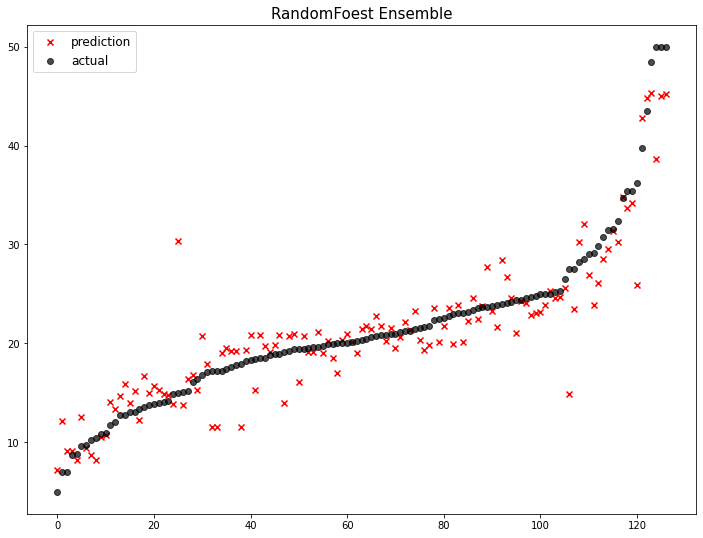

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Voting Ensemble  20.474757
6           Poly ElasticNet  15.710492
7      RandomFoest Ensemble   9.882675


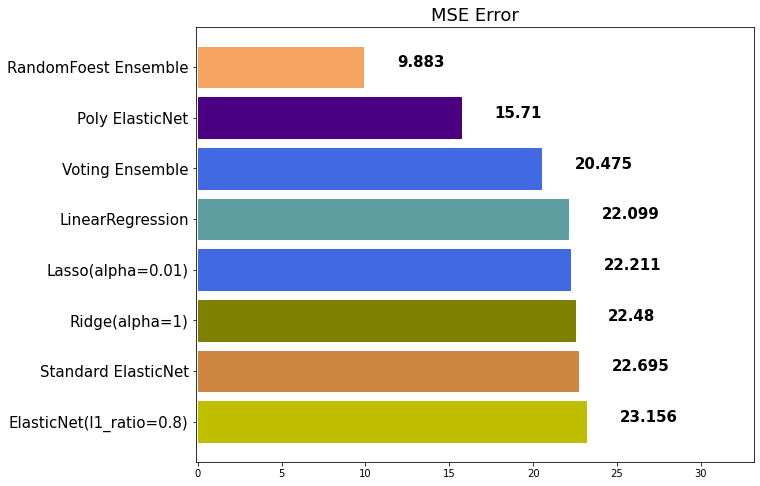

In [22]:
mse_eval('RandomFoest Ensemble', rfr_pred, y_test)

* max_depth: 깊어질 수 있는 최대 깊이, 과대적합 방지용
* n_estimators: 앙상블하는 트리의 개수
* max_features: 최대로 사용할 feature의 개수, 과대적합 방지용. 퍼센트로 입력 가능
* min_sample_split: 트리가 분할할 때 최소 샘플의 개수, default=2. 과대적합 방지용

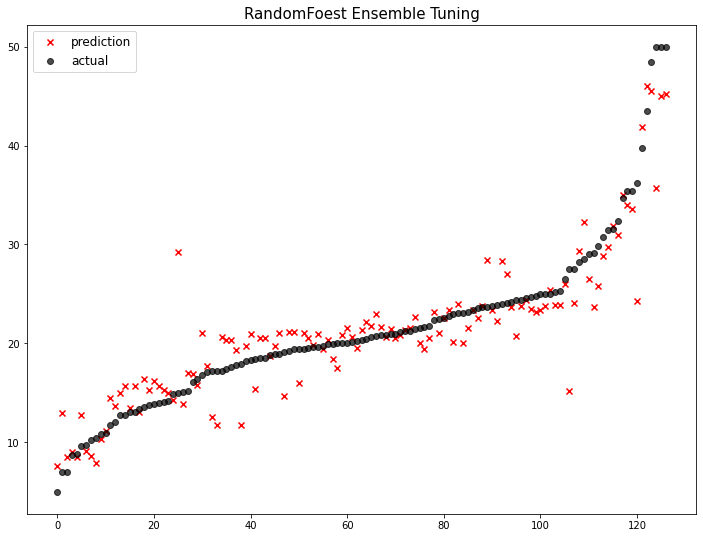

                         model        mse
0     ElasticNet(l1_ratio=0.8)  23.156236
1          Standard ElasticNet  22.694970
2               Ridge(alpha=1)  22.480476
3            Lasso(alpha=0.01)  22.210557
4             LinearRegression  22.098695
5              Voting Ensemble  20.474757
6              Poly ElasticNet  15.710492
7  RandomFoest Ensemble Tuning  10.517588
8         RandomFoest Ensemble   9.882675


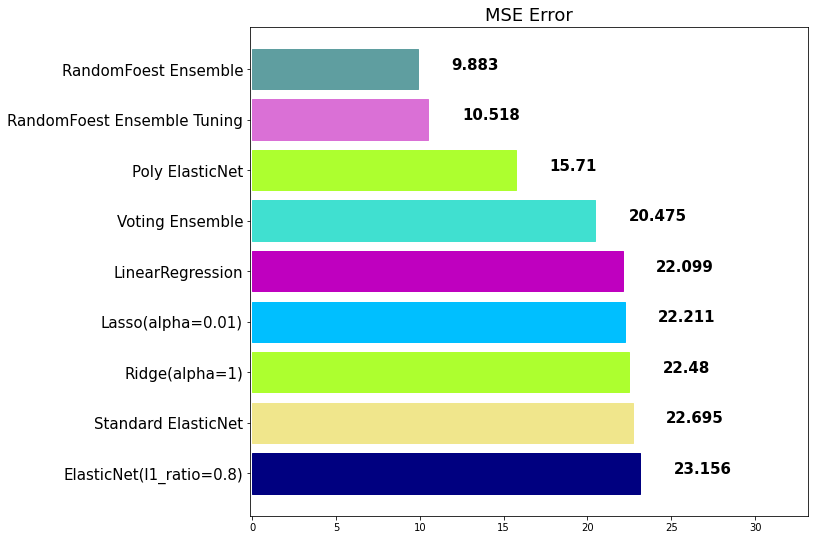

In [23]:
rfr = RandomForestRegressor(
    random_state=10, 
    n_estimators=1000,
    max_depth=7, max_features=0.9)
rfr.fit(x_train, y_train)

rfr_pred = rfr.predict(x_test)
mse_eval('RandomFoest Ensemble Tuning', rfr_pred, y_test)

### 1-5. 부스팅(Boosting)
* 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식
* 장점: 성능의 매우 우수함(Lgbm, XGBoost)
* 단점: 부스팅 알고리즘의 특성 상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할 수 있음
* 다른 앙상블 대비 학습 시간이 오래 걸림
* 대표적인 Boosting 앙상블
  1. AdaBoost
  2. GradientBoost
  3. LightGBM
  4. XGBoost

### 1-6. GradientBoost
* 성능이 우수함
* 학습 시간이 너무너무너무 느림

In [24]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

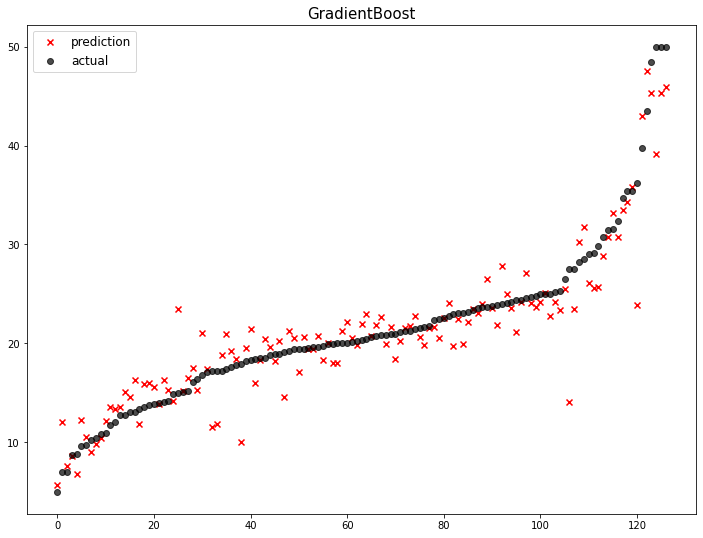

                         model        mse
0     ElasticNet(l1_ratio=0.8)  23.156236
1          Standard ElasticNet  22.694970
2               Ridge(alpha=1)  22.480476
3            Lasso(alpha=0.01)  22.210557
4             LinearRegression  22.098695
5              Voting Ensemble  20.474757
6              Poly ElasticNet  15.710492
7  RandomFoest Ensemble Tuning  10.517588
8         RandomFoest Ensemble   9.882675
9                GradientBoost   8.812709


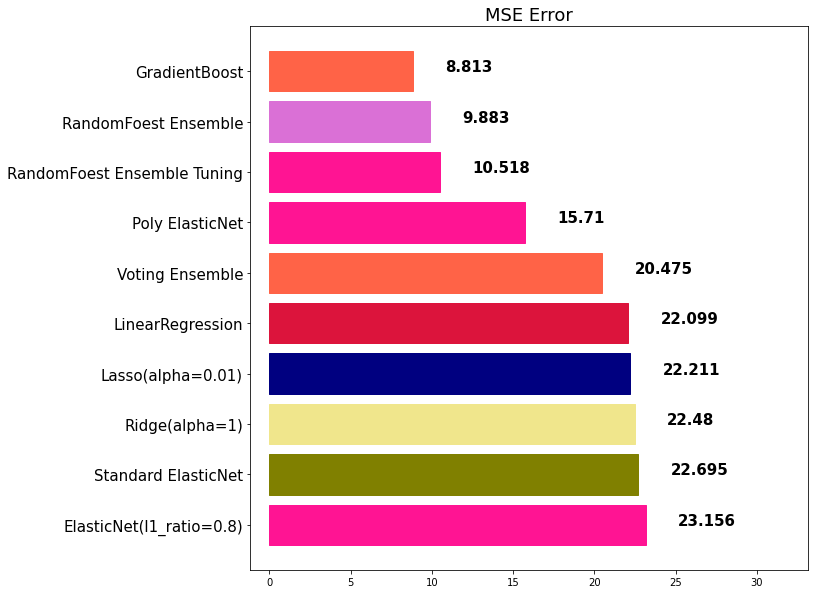

In [25]:
gbr = GradientBoostingRegressor(random_state=10)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost', gbr_pred, y_test)

* learning_rate: 학습율. 너무 큰 학습률은 성능을 떨어뜨리고, 너무 작은 학습률은 학습이 느림. 적잘한 값을 찾아야 함. n_estimators와 같이 튜닝. default=0.1
* n_estimators: 부스팅 스테이즈 수. (랜덤 포레스트 트리의 개수와 비슷한 개념). default=100

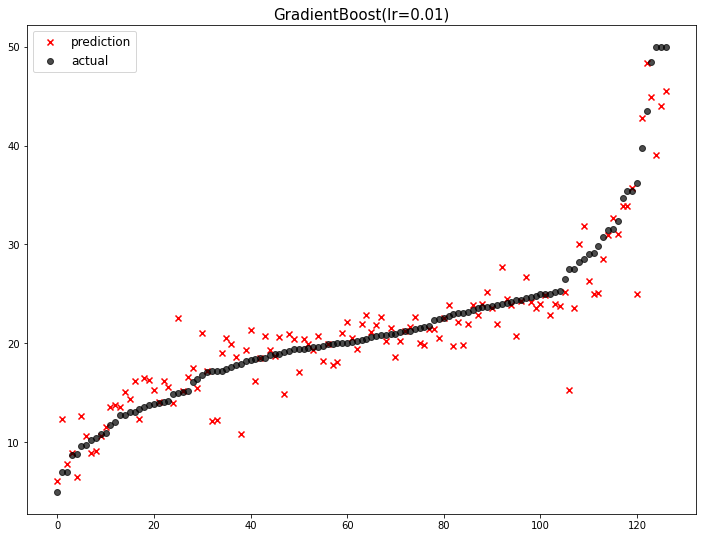

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.156236
1           Standard ElasticNet  22.694970
2                Ridge(alpha=1)  22.480476
3             Lasso(alpha=0.01)  22.210557
4              LinearRegression  22.098695
5               Voting Ensemble  20.474757
6               Poly ElasticNet  15.710492
7   RandomFoest Ensemble Tuning  10.517588
8          RandomFoest Ensemble   9.882675
9                 GradientBoost   8.812709
10       GradientBoost(lr=0.01)   8.366800


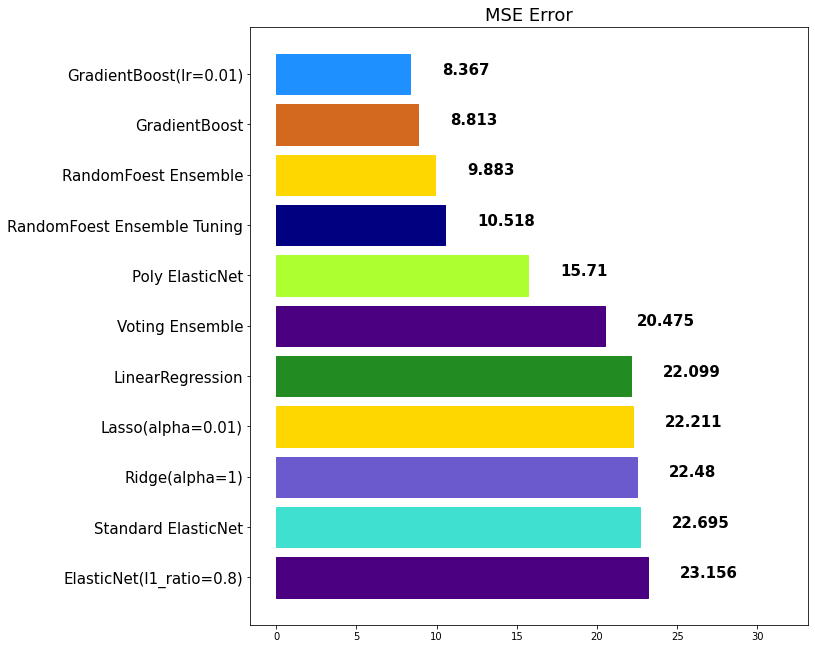

In [26]:
gbr = GradientBoostingRegressor(random_state=10, learning_rate=0.01, n_estimators=1000)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost(lr=0.01)', gbr_pred, y_test)

### 1-7. XGBoost
* eXtreme Gradient Boosting
* scikit-learn 패키지가 아님
* 성능이 우수함
* GBM보다는 빠르고 성능도 향상
* 여전히 학습 시간은 매우 느림

In [27]:
from xgboost import XGBClassifier, XGBRegressor

[10:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


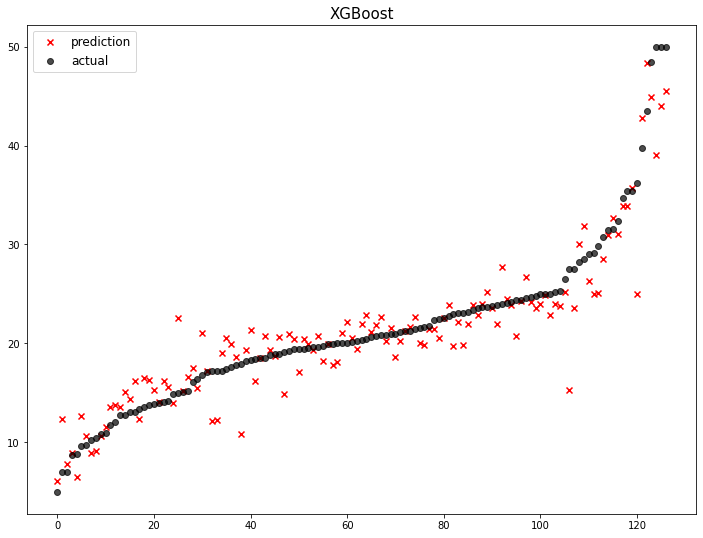

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.156236
1           Standard ElasticNet  22.694970
2                Ridge(alpha=1)  22.480476
3             Lasso(alpha=0.01)  22.210557
4              LinearRegression  22.098695
5               Voting Ensemble  20.474757
6               Poly ElasticNet  15.710492
7   RandomFoest Ensemble Tuning  10.517588
8          RandomFoest Ensemble   9.882675
9                 GradientBoost   8.812709
10       GradientBoost(lr=0.01)   8.366800
11                      XGBoost   8.366800


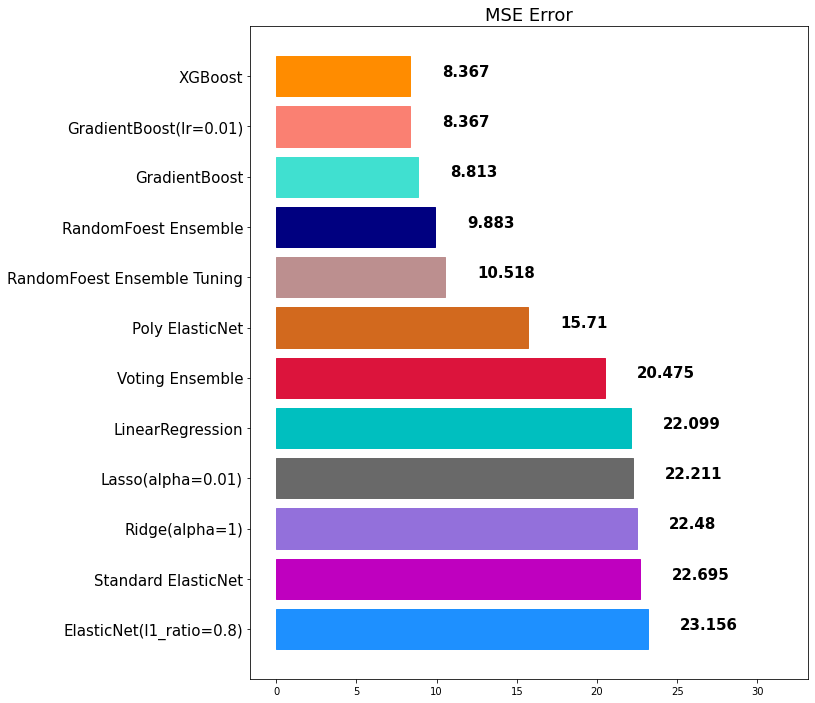

In [28]:
xgb = XGBRegressor(random_state=10)
xgb.fit(x_train, y_train)
xgb_pred = gbr.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

### 1-8. LightGBM
* scikit-learn 패키지가 아님
* 성능이 우수함
* 속도가 매우 빠름

In [29]:
from lightgbm import LGBMClassifier, LGBMRegressor

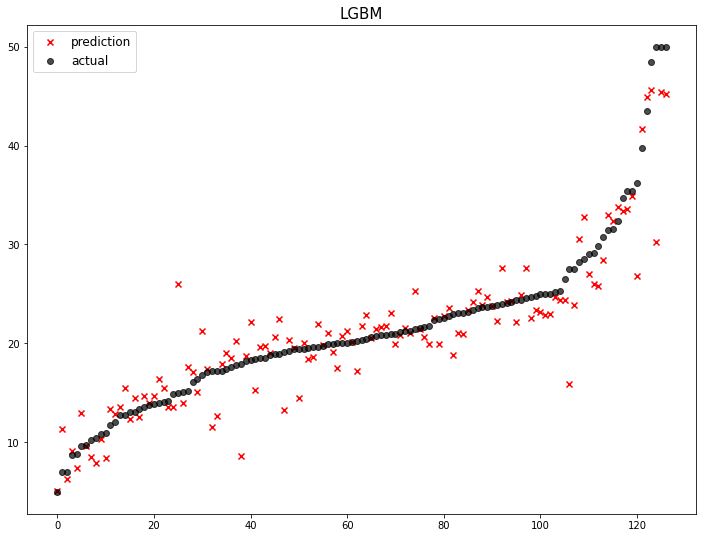

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.156236
1           Standard ElasticNet  22.694970
2                Ridge(alpha=1)  22.480476
3             Lasso(alpha=0.01)  22.210557
4              LinearRegression  22.098695
5               Voting Ensemble  20.474757
6               Poly ElasticNet  15.710492
7                          LGBM  10.937726
8   RandomFoest Ensemble Tuning  10.517588
9          RandomFoest Ensemble   9.882675
10                GradientBoost   8.812709
11       GradientBoost(lr=0.01)   8.366800
12                      XGBoost   8.366800


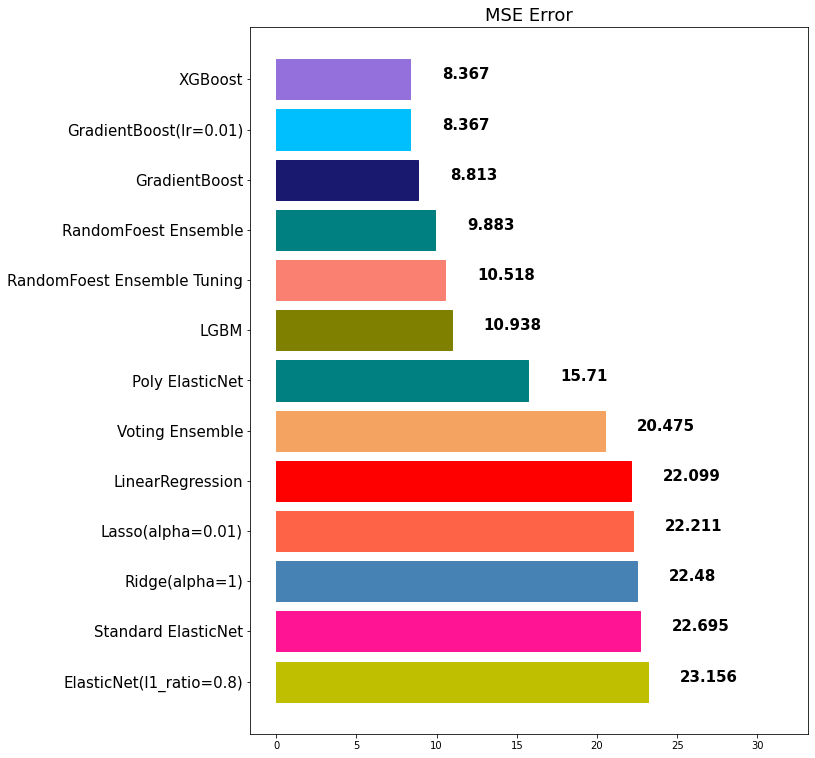

In [30]:
lgbm = LGBMRegressor(random_state=10)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

### 1-9. Stacking
* 개별 모델이 예측한 데이터를 기반으로 final_estimator를 종합하여 예측을 수행
* 성능을 극으로 끌어올릴 때 활용
* 과대적합을 유발할 수 있음(특히 데이터셋이 적은 경우)

In [31]:
from sklearn.ensemble import StackingRegressor

In [32]:
stack_models = [
    ('elasticnet', poly_pipeline),
    ('randomforest', rfr),
    ('gbr', gbr),
    ('lgbm', lgbm)
]

In [33]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1) # xgb를 마지막으로 한번더 사용

[10:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


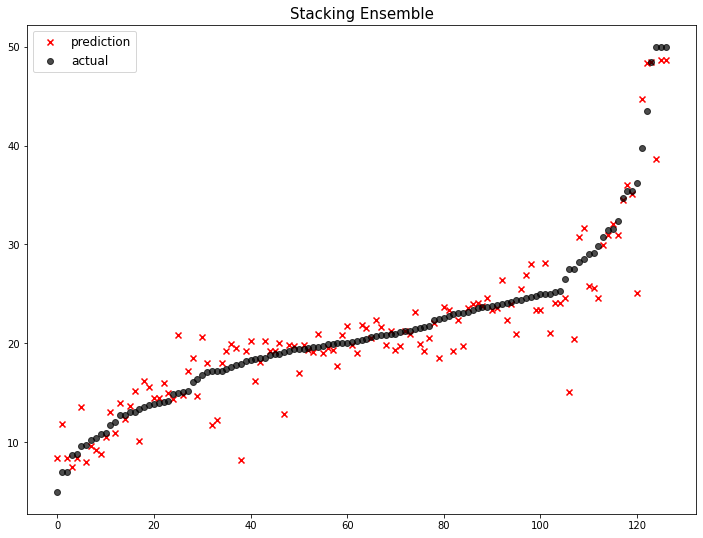

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.156236
1           Standard ElasticNet  22.694970
2                Ridge(alpha=1)  22.480476
3             Lasso(alpha=0.01)  22.210557
4              LinearRegression  22.098695
5               Voting Ensemble  20.474757
6               Poly ElasticNet  15.710492
7                          LGBM  10.937726
8   RandomFoest Ensemble Tuning  10.517588
9          RandomFoest Ensemble   9.882675
10                GradientBoost   8.812709
11            Stacking Ensemble   8.802903
12       GradientBoost(lr=0.01)   8.366800
13                      XGBoost   8.366800


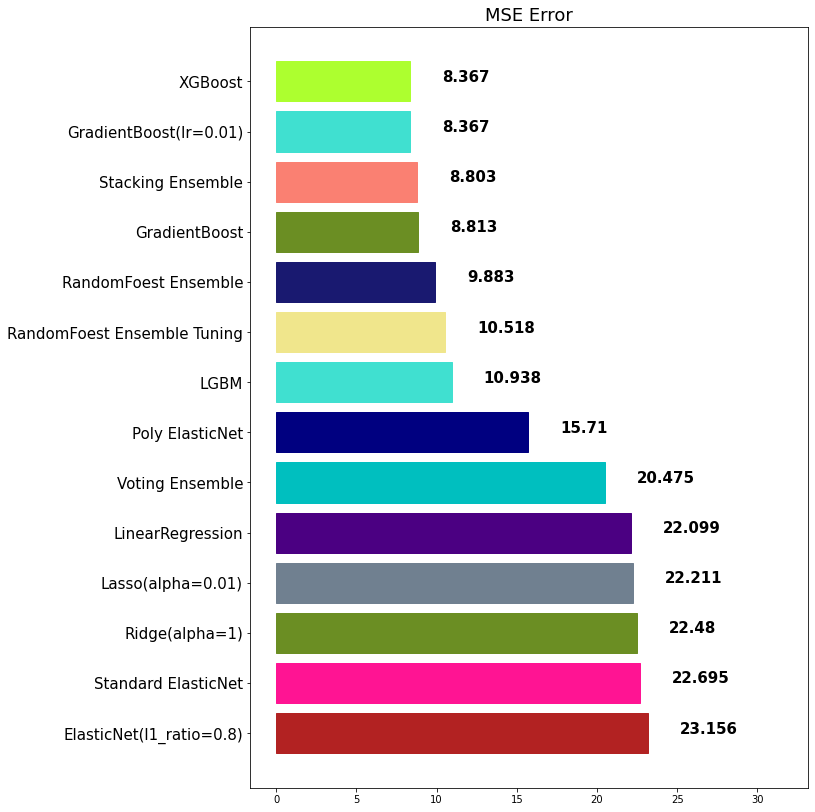

In [34]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

### 1-10. Weighted Blending
* 각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
* 모델의 대한 가중치를 조절하여, 최종 output을 산출
* 가중치의 합은 1.0이 되도록 함

In [35]:
final_outputs = { # 예측값들을 넣음
    'elasticnet': poly_pred,
    'randomforest': rfr_pred,
    'gbr': gbr_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred,
    'stacking': stack_pred
}

In [36]:
final_prediction=\
final_outputs['elasticnet'] * 0.1\
+ final_outputs['randomforest'] * 0.1\
+ final_outputs['gbr'] * 0.2\
+ final_outputs['xgb'] * 0.25\
+ final_outputs['lgbm'] * 0.15\
+ final_outputs['stacking'] * 0.2\
# 이전에 사용해보고 해당 데이터에 좋은 성능을 보인 모델을 골라서 더 좋았다면 더 가중치를 주어서 학습

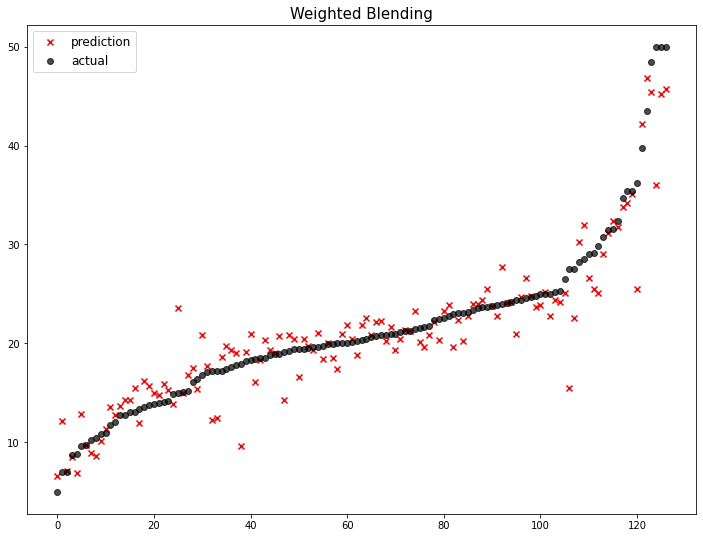

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.156236
1           Standard ElasticNet  22.694970
2                Ridge(alpha=1)  22.480476
3             Lasso(alpha=0.01)  22.210557
4              LinearRegression  22.098695
5               Voting Ensemble  20.474757
6               Poly ElasticNet  15.710492
7                          LGBM  10.937726
8   RandomFoest Ensemble Tuning  10.517588
9          RandomFoest Ensemble   9.882675
10                GradientBoost   8.812709
11            Stacking Ensemble   8.802903
12            Weighted Blending   8.615903
13       GradientBoost(lr=0.01)   8.366800
14                      XGBoost   8.366800


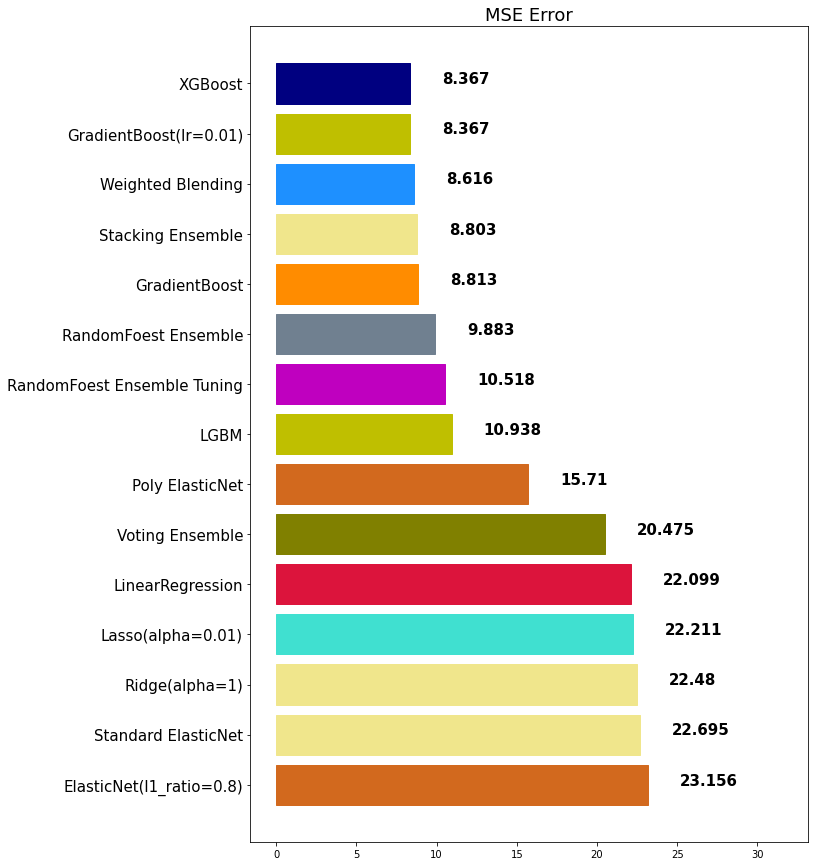

In [37]:
mse_eval('Weighted Blending', final_prediction, y_test)

### 1-11. 앙상블 모델 정리
* 앙상블은 대체적으로 단일 모델 대비 성능이 좋음
* 앙상블을 앙상블하는 기법인 Stacking과 Weighted Blending도 고려해볼만한 기법
* 앙상블 모델은 적절한 하이퍼파라미터 튜닝이 매우 중요
* 앙상블 모델은 대체적으로 학습시간이 더 오래 걸림
* 모델 튜닝을 하는데 걸리는 시간이 오래 소요

# 2. 교차 검증(Cross Validation)

* 교차검증은 모델을 평가하는 하나의 방법
* K-겹 교차검증(K-fold Cross Validation)을 많이 활용
* K-fold 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 함

In [38]:
from IPython.display import Image

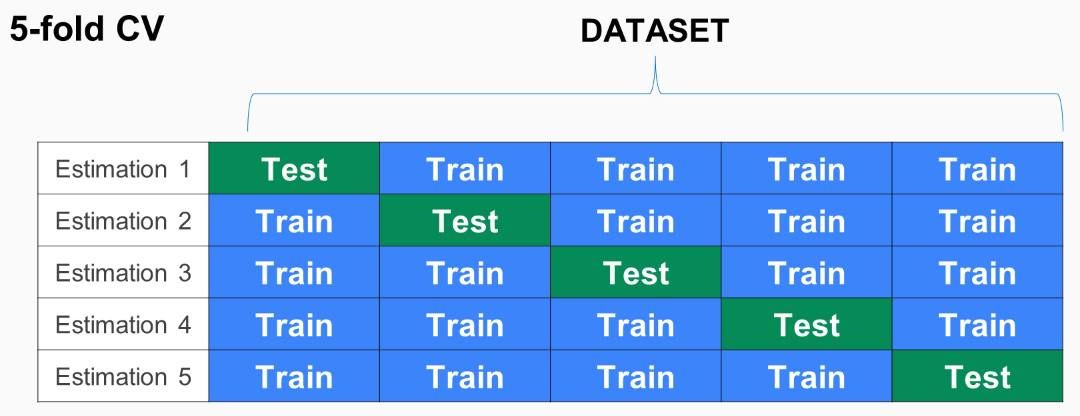

In [39]:
Image('kfold.png', width=800)

### 2-1. K-Fold Cross Validation Set 만들기

In [40]:
from sklearn.model_selection import KFold

In [41]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=42, shuffle=True) # 무조건 random_state 필수

In [42]:
X = np.array(df.drop('MEDV',1))
Y = np.array(df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [43]:
lgbm_fold = LGBMRegressor(random_state=42)

In [44]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
  x_train_fold, x_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = Y[train_index], Y[test_index]
  lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
  error = mean_squared_error(lgbm_pred_fold, y_test_fold)
  print('Fold = {}, prediction score = {:.2f}'.format(i, error))
  total_error += error
  i += 1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 8.34
Fold = 2, prediction score = 10.40
Fold = 3, prediction score = 17.58
Fold = 4, prediction score = 6.94
Fold = 5, prediction score = 12.16
------------------------------
Average Error: 11.083201392666322


## 3. 하이퍼파라미터 튜닝

* 하이퍼파라미터 튜닝 시 경우의 수가 너무 많음
* 자동화할 필요가 있음
* sklearn 패키지에서는 자주 사용되는 하이퍼파라미터 튜닝을 돕는 클래스가 존재
  * RandomizeSearchCV
  * GridSearchCV

### 3-1. RandomizedSearchCV
* 모든 매개변수값이 시도되는 것이 아니라 지정된 분포에서 고정된 수의 매개변수 설정이 샘플링 됨
* 시도된 매개변수 설정의 수는 n_iter에 의해 제공됨

### ✔️적용하는 방법
* 사용할 Search 방법을 선택
* hyperparameter 도메인을 설정(max_depth, n_estimaters .. 등등)
* 학습을 시킨 후 기다림
* 도출된 결과 값을 모델에 적용하고 성능을 비교

In [45]:
params = {
    'n_estimaters' : [200, 500, 1000, 2000],
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth' : [6, 7, 8],
    'colsample_bytree' : [0.8, 0.9, 1.0], # 샘플 사용 비율. (max_features와 비슷한 개념). 과대적합 방지용. default=1.0
    'subsample' : [0.8, 0.9, 1.0]
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# n_iter : 총 몇회의 시도를 진행할 것인지 정의(횟수가 늘어나면 좋은 파라미터를 찾을 확률이 높지만 그만큼 시간이 오래 걸림)
# cv: 검증을 위한 분할 검증 횟수
# scoring : 뭘 기준으로 점수를 부여할지
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=10, n_iter=25, cv=3,  scoring='neg_mean_squared_error')

In [49]:
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8],
                                        'n_estimaters': [200, 500, 1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=10, scoring='neg_mean_squared_error')

In [50]:
clf.best_score_

-14.136324389812726

In [51]:
clf.best_params_

{'subsample': 1.0,
 'n_estimaters': 2000,
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}

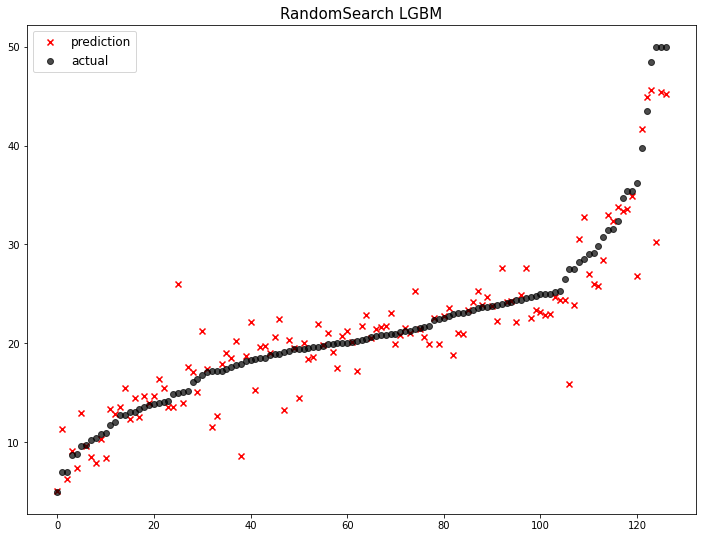

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.156236
1           Standard ElasticNet  22.694970
2                Ridge(alpha=1)  22.480476
3             Lasso(alpha=0.01)  22.210557
4              LinearRegression  22.098695
5               Voting Ensemble  20.474757
6               Poly ElasticNet  15.710492
7                          LGBM  10.937726
8             RandomSearch LGBM  10.937726
9   RandomFoest Ensemble Tuning  10.517588
10         RandomFoest Ensemble   9.882675
11                GradientBoost   8.812709
12            Stacking Ensemble   8.802903
13            Weighted Blending   8.615903
14       GradientBoost(lr=0.01)   8.366800
15                      XGBoost   8.366800


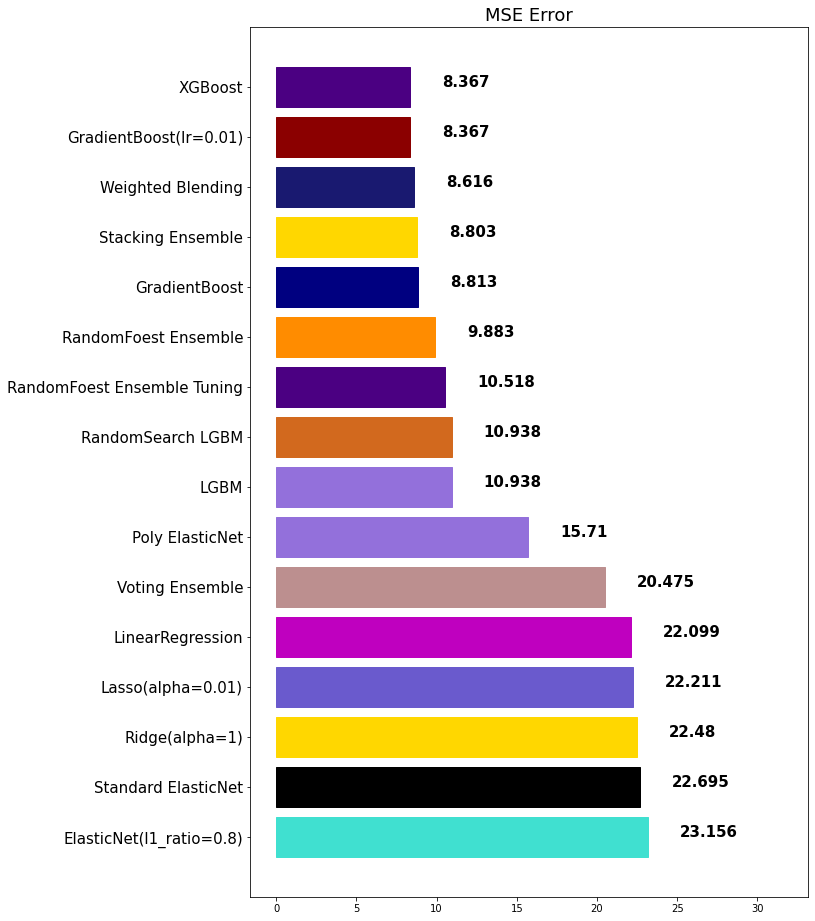

In [53]:
lgbm_best = LGBMRegressor(subsample=1.0, n_estimators=2000, max_depth=6, learning_rate=0.1, colsample_bytree=0.9)
lgbm_best_pred = lgbm.fit(x_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', lgbm_best_pred, y_test)

### 3-2. GridSearchCV
* 모든 매개변수 값에 대하여 완전 탐색을 시도
* 최적화할 파라미터가 많다면 시간이 매우 오래 걸림

In [54]:
params = {
    'n_estimaters' : [500, 1000],
    'learning_rate' : [0.1, 0.05, 0.01],
    'max_depth' : [7, 8],
    'colsample_bytree' : [0.8, 0.9],
    'subsample' : [0.8, 0.9]
}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [57]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimaters': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [58]:
grid_search.best_score_ 

-14.287802193591878

In [59]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimaters': 500,
 'subsample': 0.8}

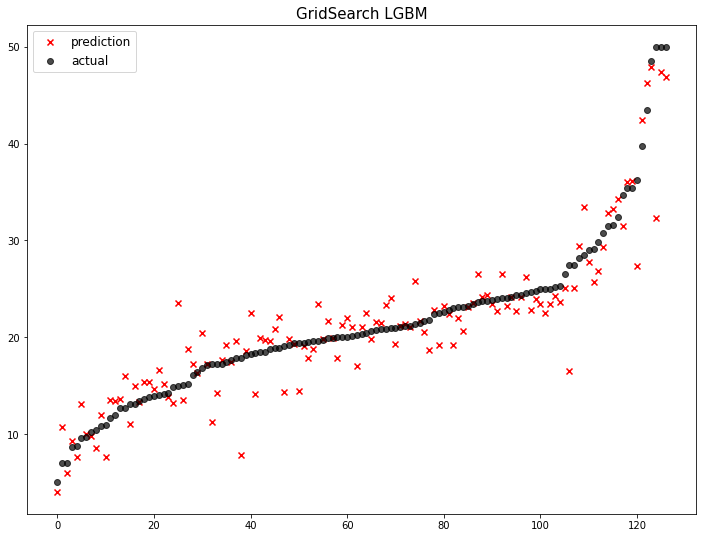

                          model        mse
0      ElasticNet(l1_ratio=0.8)  23.156236
1           Standard ElasticNet  22.694970
2                Ridge(alpha=1)  22.480476
3             Lasso(alpha=0.01)  22.210557
4              LinearRegression  22.098695
5               Voting Ensemble  20.474757
6               Poly ElasticNet  15.710492
7                          LGBM  10.937726
8             RandomSearch LGBM  10.937726
9   RandomFoest Ensemble Tuning  10.517588
10         RandomFoest Ensemble   9.882675
11              GridSearch LGBM   9.729784
12                GradientBoost   8.812709
13            Stacking Ensemble   8.802903
14            Weighted Blending   8.615903
15       GradientBoost(lr=0.01)   8.366800
16                      XGBoost   8.366800


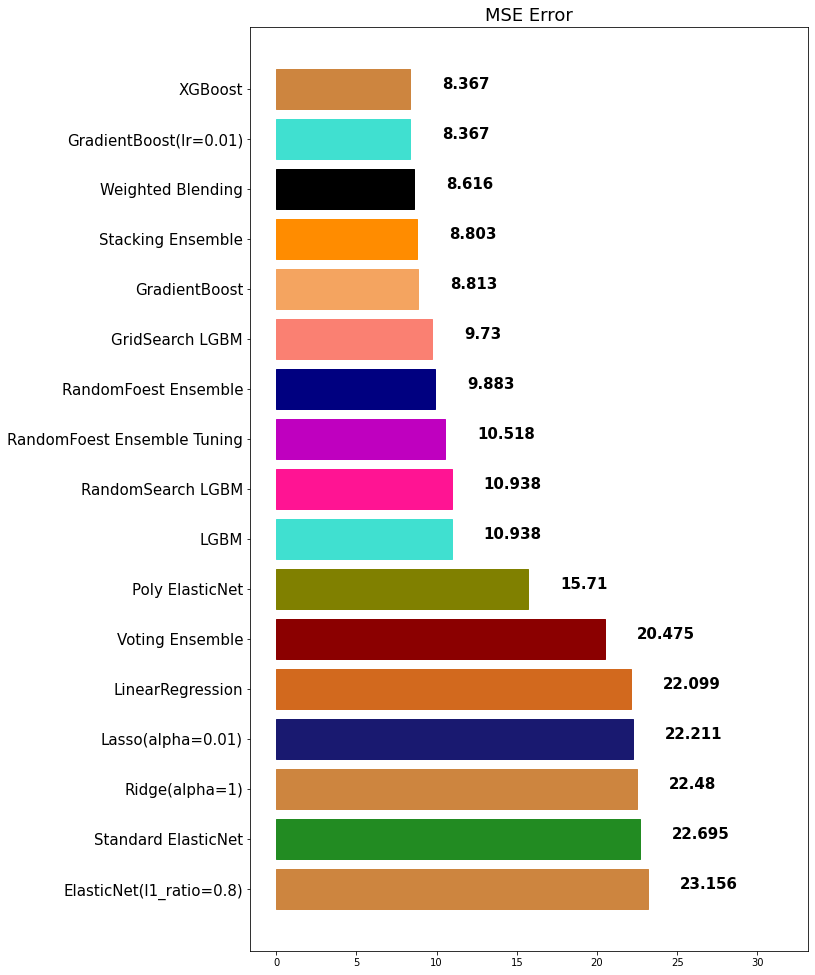

In [60]:
lgbm_best = LGBMRegressor(n_estimators=500, subsample=0.8, learning_rate=0.1, max_depth=7)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)